In [1]:
from mxnet import autograd,nd
num_inputs=2
num_examples=1000
true_w=[2,-3.4]
true_b=4.2
features=nd.random.normal(scale=1,shape=(num_examples,num_inputs))
labels=true_w[0]*features[:,0]+true_w[1]*features[:,1]+true_b
labels+=nd.random.normal(scale=0.01,shape=labels.shape)

/home/tomoya/.local/lib/python3.5/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.23) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


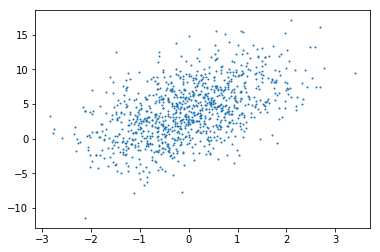

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(features[:,0].asnumpy(),labels.asnumpy(),1)

In [3]:
from mxnet.gluon import data as gdata
batch_size=10
dataset=gdata.ArrayDataset(features,labels)
data_iter=gdata.DataLoader(dataset,batch_size,shuffle=True)

In [4]:
from mxnet.gluon import nn
net=nn.Sequential()
net.add(nn.Dense(1))

In [5]:
from mxnet import init
net.initialize(init.Normal(sigma=0.01))

In [6]:
from mxnet.gluon import loss as gloss
loss=gloss.L2Loss()

In [7]:
from mxnet.gluon import Trainer
optim=Trainer(net.collect_params(),'sgd',{'learning_rate':0.03})

In [8]:
epochs=3
for epoch in range(epochs):
    for X,y in data_iter:
        with autograd.record():
            l=loss(net(X),y)
        l.backward()
        optim.step(batch_size)
    l=loss(net(features),labels)
    print('epoch %d,loss:%f'%(epoch,l.mean().asnumpy()))

epoch 0,loss:0.040508
epoch 1,loss:0.000155
epoch 2,loss:0.000051


In [9]:
dense=net[0]
true_w,dense.weight.data()

([2, -3.4], 
 [[ 1.9993534 -3.3997514]]
 <NDArray 1x2 @cpu(0)>)

In [10]:
true_b,dense.bias.data()

(4.2, 
 [4.1993628]
 <NDArray 1 @cpu(0)>)